# Data Visualisation - Milestone 1 Notebook

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 1. Dataset

## 2. Problematic

## 3. Exploratory Data Analysis

Pre-processing of the data set you chose:

- Show some basic statistics and get insights about the data


### 3.1 Covid-19 Current Situation

In [2]:
PATH_COVID_SITUATION = os.path.expanduser('~/Documents/GitHub/com-480-project-pouletpanier/data/COVID-19-geographic-disbtribution-worldwide.xlsx')

In [3]:
covid_situation = pd.read_excel(PATH_COVID_SITUATION)

In [4]:
covid_situation.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
2,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


#### 3.1.1 Total Number of cases and deaths worldwide

In [5]:
number_cases = covid_situation['cases'].sum()

In [6]:
number_deaths = covid_situation['deaths'].sum()

In [7]:
last_date = covid_situation['dateRep'][0]

In [8]:
print(f'The total number of cases due to the COVID-19 worldwide until {last_date.date()} is {number_cases} and the total number of deaths is {number_deaths}')

The total number of cases due to the COVID-19 worldwide until 2020-03-31 is 777798 and the total number of deaths is 37272


#### 3.1.2 Total Number of cases and deaths per Country 

- we can add also the statistics for continents and also the pourcentage of the population that is infected by the COVID-19

In [9]:
cases_per_country = covid_situation.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False)

In [10]:
cases_per_country.head(10)

countriesAndTerritories
United_States_of_America    164620
Italy                       101739
Spain                        85195
China                        82241
Germany                      61913
France                       44550
Iran                         41495
United_Kingdom               22141
Switzerland                  15412
Belgium                      11899
Name: cases, dtype: int64

In [11]:
deaths_per_country = covid_situation.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False)

In [12]:
deaths_per_country.head(10)

countriesAndTerritories
Italy                       11591
Spain                        7340
China                        3309
United_States_of_America     3170
France                       3024
Iran                         2757
United_Kingdom               1408
Netherlands                   864
Germany                       583
Belgium                       513
Name: deaths, dtype: int64

#### 3.1.3 Get some plots

- Total number of new cases/deaths by time (daily)
- Total number of cases/deaths by time (daily)

In [13]:
covid_situation_per_day = covid_situation.groupby('dateRep')['cases','deaths'].sum()

In [14]:
plot_covid_situation_per_day = covid_situation_per_day.iloc[::3,:]

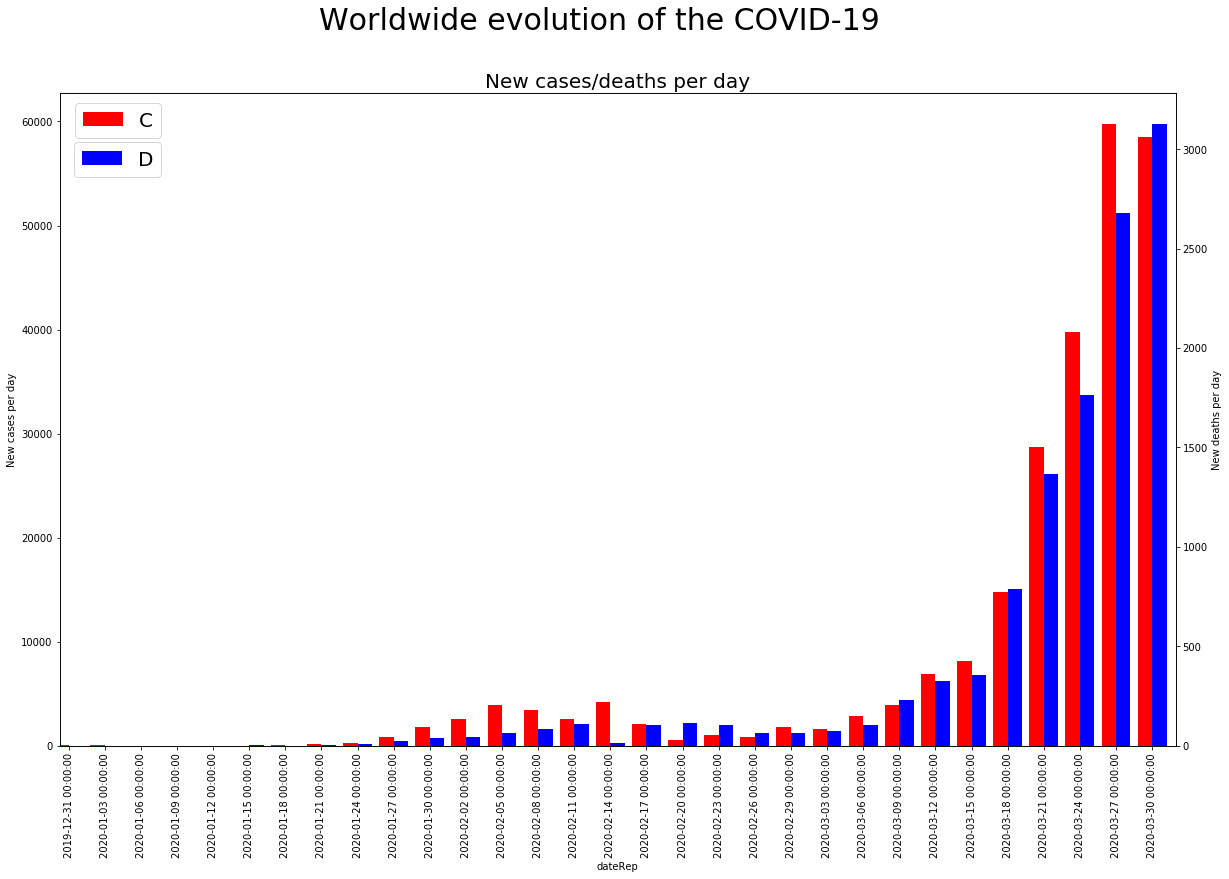

In [15]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

plot_covid_situation_per_day['cases'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
plot_covid_situation_per_day['deaths'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('New cases per day')
ax2.set_ylabel('New deaths per day')

ax.legend('Cases', bbox_to_anchor=(0.1,1), fontsize=20)
ax2.legend('Deaths', bbox_to_anchor=(0.1,0.94), fontsize=20)

fig.suptitle('Worldwide evolution of the COVID-19', fontsize=30)
plt.title('New cases/deaths per day', fontsize=20)

plt.show()

In [16]:
cumulative_covid_situation_per_day = covid_situation_per_day.cumsum()

In [17]:
plot_cumulative_covid_situation_per_day = cumulative_covid_situation_per_day.iloc[::3,:]

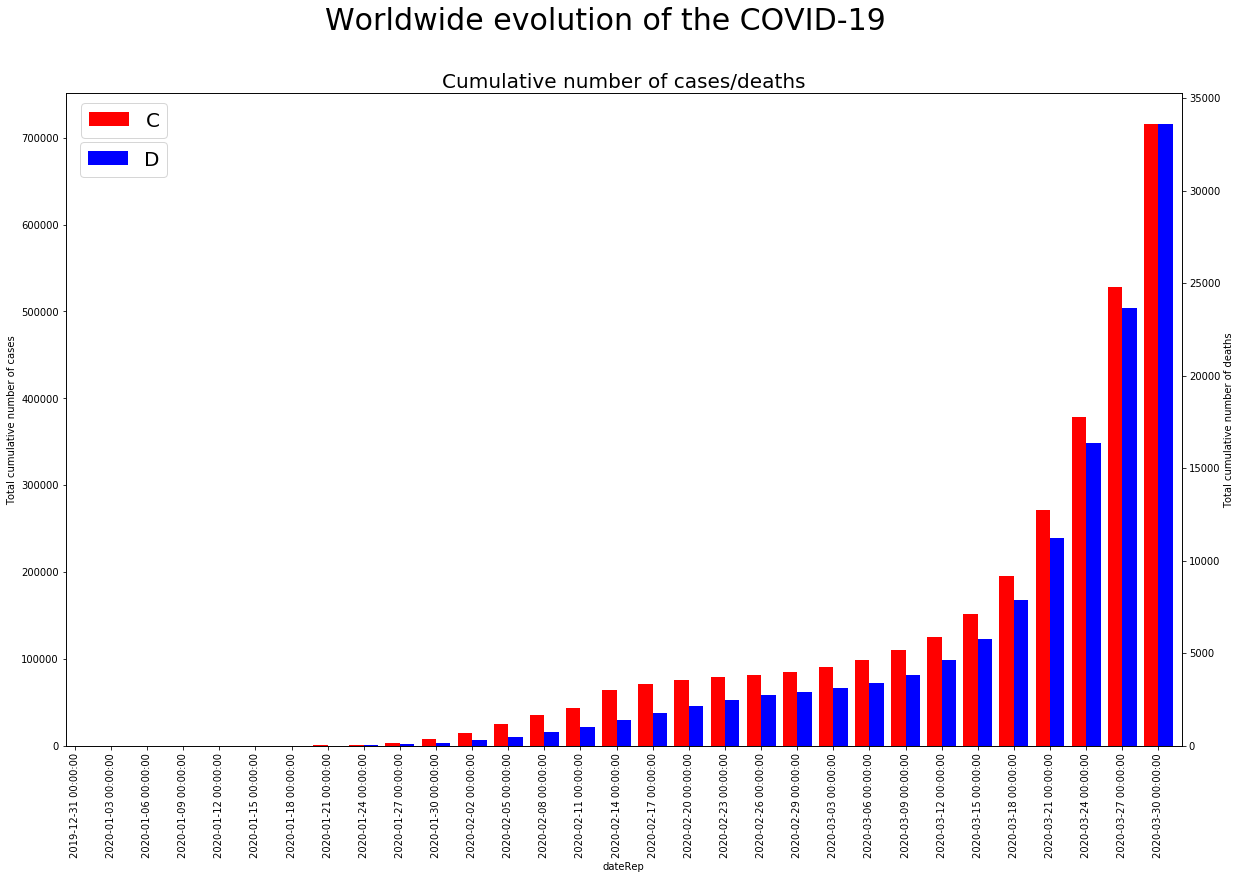

In [18]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

plot_cumulative_covid_situation_per_day['cases'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
plot_cumulative_covid_situation_per_day['deaths'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Total cumulative number of cases')
ax2.set_ylabel('Total cumulative number of deaths')

ax.legend('Cases', bbox_to_anchor=(0.1,1), fontsize=20)
ax2.legend('Deaths', bbox_to_anchor=(0.1,0.94), fontsize=20)

fig.suptitle('Worldwide evolution of the COVID-19', fontsize=30)
plt.title('Cumulative number of cases/deaths', fontsize=20)
plt.show()

### 3.2 Governements decisions

In [19]:
PATH_GOV_DECISIONS = os.path.expanduser('~/Documents/GitHub/com-480-project-pouletpanier/data/COVID 19 Containment measures data.csv')

In [20]:
gov_decisions = pd.read_csv(PATH_GOV_DECISIONS)

In [21]:
gov_decisions.head()

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
0,163,NaN,Austria,"Mar 16, 2020",NaN,On 10 March 2020 government announced that all...,NaN,NaN,NaN,university closure,NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
1,132,NaN,Germany,"Feb 01, 2020",NaN,"102 German citizens and 26 relatives, all of w...",NaN,NaN,NaN,"international traveller screening, traveller q...",NaN,https://www.tagesschau.de/inland/coronavirus-g...,NaN,NaN,NaN,NaN
2,578,NaN,United Kingdom,"Mar 20, 2020",NaN,"All schools, nurseries and colleges closed.",NaN,NaN,NaN,"nursery schools closure, school closure, unive...",NaN,https://www.theguardian.com/world/2020/mar/18/...,NaN,NaN,NaN,NaN
3,372,NaN,United Kingdom,"Mar 16, 2020",NaN,If one person in any household has a persisten...,NaN,NaN,NaN,"14 days, contact isolation",NaN,https://www.bbc.com/news/uk-51920444,NaN,NaN,NaN,NaN
4,357,NaN,United Kingdom,"Mar 16, 2020",NaN,"By the weekend, those with the most serious he...",NaN,NaN,NaN,isolation advice to elderly,NaN,https://www.bbc.com/news/uk-51920444,NaN,NaN,NaN,NaN


### 3.3 Ebola

In [22]:
PATH_EBOLA = os.path.expanduser('~/Documents/GitHub/com-480-project-pouletpanier/data/ebola_2014_2016_clean.csv')

In [23]:
ebola = pd.read_csv(PATH_EBOLA)

In [24]:
ebola.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [25]:
ebola = ebola.rename(columns={'No. of confirmed, probable and suspected cases':'Total cases', 'No. of confirmed, probable and suspected deaths':'Total deaths'})

In [26]:
ebola_per_day = ebola.groupby('Date')['Total cases', 'Total deaths'].sum()

In [27]:
cumulative_ebola_per_day = ebola_per_day

In [28]:
plot_cumulative_ebola_per_day = cumulative_ebola_per_day.iloc[::8, :]

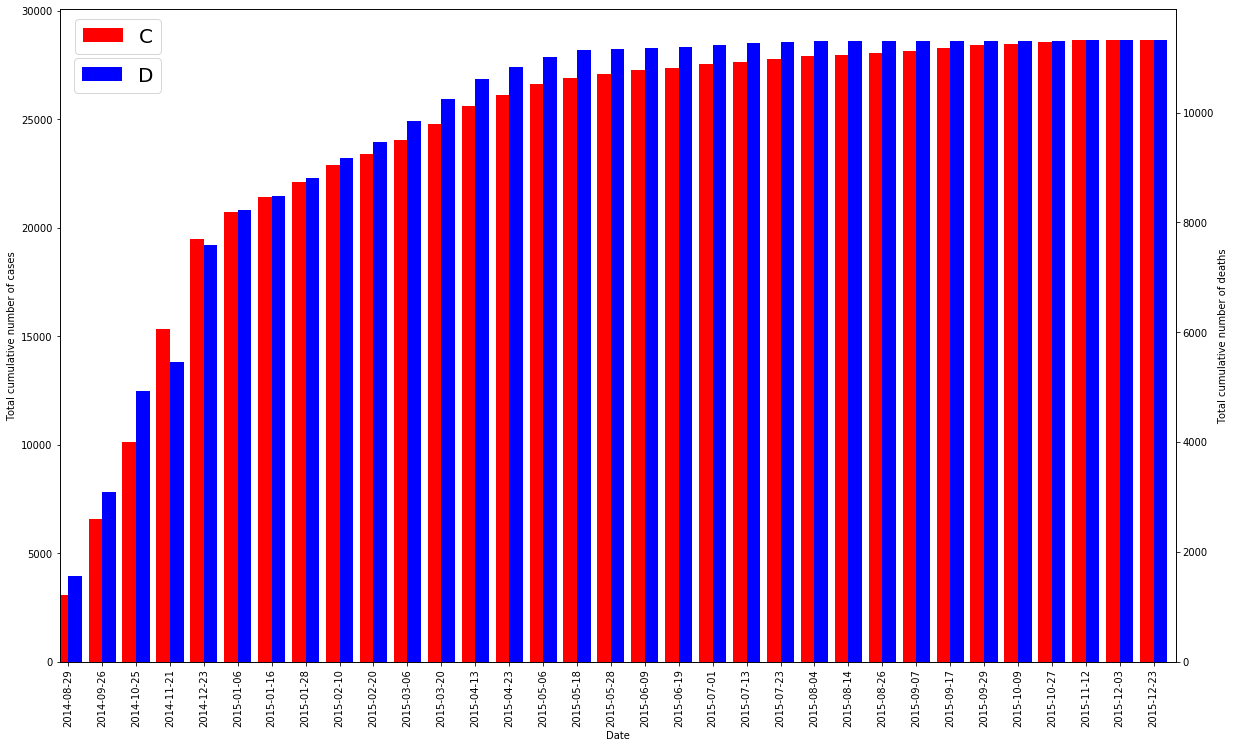

In [29]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

plot_cumulative_ebola_per_day['Total cases'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
plot_cumulative_ebola_per_day['Total deaths'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Total cumulative number of cases')
ax2.set_ylabel('Total cumulative number of deaths')

ax.legend('Cases', bbox_to_anchor=(0.1,1), fontsize=20)
ax2.legend('Deaths', bbox_to_anchor=(0.1,0.94), fontsize=20)

plt.show()

### 3.4 SARS

In [30]:
PATH_SARS = os.path.expanduser('~/Documents/GitHub/com-480-project-pouletpanier/data/sars_2003_complete_dataset_clean.csv')

In [31]:
sars = pd.read_csv(PATH_SARS)

In [32]:
sars.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [33]:
cumulative_sars_per_day = sars.groupby('Date')['Cumulative number of case(s)', 'Number of deaths'].sum()

In [34]:
plot_cumulative_sars_per_day = cumulative_sars_per_day.iloc[::3,:]

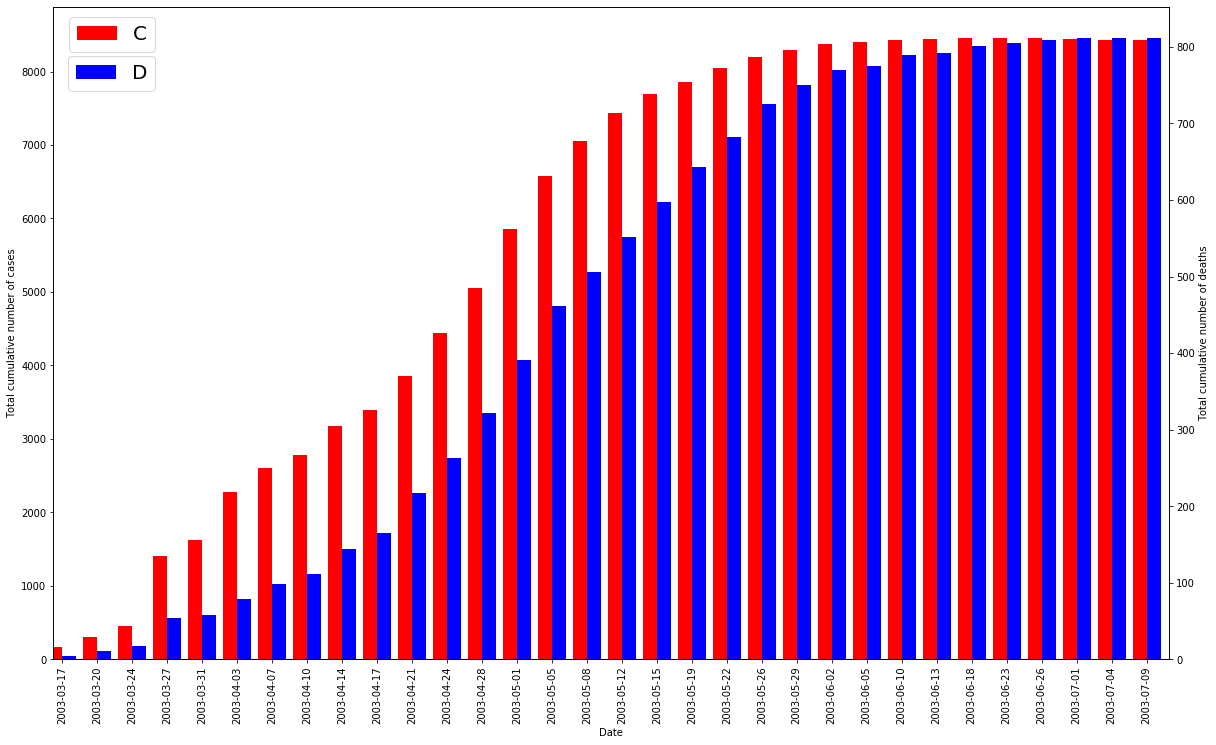

In [35]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

plot_cumulative_sars_per_day['Cumulative number of case(s)'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
plot_cumulative_sars_per_day['Number of deaths'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Total cumulative number of cases')
ax2.set_ylabel('Total cumulative number of deaths')

ax.legend('Cases', bbox_to_anchor=(0.1,1), fontsize=20)
ax2.legend('Deaths', bbox_to_anchor=(0.1,0.94), fontsize=20)

plt.show()

## 4. Related work